# Beste boulderaar 2019

Dit jupyter Notebook is een analyse van de wereldkampioenschappen boulderen 2019. Over 2019, omdat in 2020 geen wedstrijden gehouden werden, en het seizoen van 2021 nog niet af is.

Het seizoen bestaat uit zeven wedstrijden. Tijdens een wedstrijd is er een kwalificatieronde, waarbij iedere deelnemer 5 (klim)problemen (boulders) kan proberen. De beste 20 halen de halve finale. Deze bestaat uit 4 moeilijkere boulders. De top 6 gaat door naar de finale en krijgen 4 boulders met de hoogste moeilijkheidsgraad. 
De top 30 verdienen punten, en na het einde van het seizoen is de klimmer met de meeste punten de beste.

Door deze volgende dataset op te schonen en te analyseren zullen we de beste boulderaars van 2019 vinden.

## Inlezen dataset
[De dataset komt van Kaggle.](https://www.kaggle.com/brkurzawa/ifsc-sport-climbing-competition-results) De uploader heeft alle resultaten van alle wedstrijden van het IFSC (internationale klimsport federatie) tot 2019 gescrapd. Het bestaat dus uit 4 bestanden, lead, boulder, speed en combined. Voor deze analyse is alleen het bestand <code>boulder_results</code> gebruikt.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

resultaten_df = pd.read_csv("boulder_results.csv")
print(f"Aantal rijen: {resultaten_df.shape[0]}, Aantal kolommen: {resultaten_df.shape[1]}")
resultaten_df.head(5)

Aantal rijen: 9741, Aantal kolommen: 13


,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category
0,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Naile,MEIGNAN,FRA,15.0,1,6T7z99,NaN,NaN,3T4z55,3T4z89,boulder
1,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Miriam,FOGU,ITA,27.0,2,4T8z814,NaN,NaN,3T4z55,2T4z27,boulder
2,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Vanda,MICHALKOVA,SVK,48.0,3,6T7z89,NaN,NaN,3T3z43,2T3z23,boulder
3,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Lola,SAUTIER,FRA,17.0,4,4T6z69,NaN,NaN,2T3z89,1T3z38,boulder
4,European Youth Championships (B) - Brixen (ITA...,20 - 22 September 2019,Polina,KULAGINA,RUS,39.0,5,4T6z611,NaN,NaN,3T4z76,1T3z47,boulder


## Opschonen van dataset

Er waren in 2019 7 wereldkampioenschappen. Via regex worden rijen verwijderd die:
1. Niet wereldkampioenschappen zijn
2. Niet wedstrijden voor volwassenen zijn
3. Niet in 2019 waren.

In [2]:
world_2019_df = resultaten_df[resultaten_df["Competition Title"].str.contains("World", regex=False)]
world_2019_df = world_2019_df[-world_2019_df["Competition Title"].str.contains("Youth", regex=False)]
world_2019_df = world_2019_df[world_2019_df["Competition Title"].str.contains("2019", regex=False)]

print("Aantal atleten dat meedeed aan wedstrijd:")
world_2019_df["Competition Title"].value_counts()

Aantal atleten dat meedeed aan wedstrijd:


IFSC Climbing Worldcup (B) - Meiringen (SUI) 2019          215
IFSC Climbing Worldcup (B) - Munich (GER) 2019             208
IFSC Climbing Worldcup (B,S) - Moscow (RUS) 2019           202
IFSC Climbing World Championships - Hachioji (JPN) 2019    193
IFSC Climbing Worldcup (B,S) - Chongqing (CHN) 2019        186
IFSC Climbing Worldcup (B,S) - Wujiang (CHN) 2019          180
IFSC Climbing Worldcup (B) - Vail (USA) 2019               112
Name: Competition Title, dtype: int64

Elke entry in LAST (achternaam) is in hoofdletters. Dit wordt veranderdt naar hetzelfde format als FIRST; 1 hoofdletter, rest kleine letters.

In [3]:
world_2019_df['LAST'] = world_2019_df['LAST'].apply(lambda x: x.capitalize())

## Toevoegen van nieuwe kolommen

Iedere atleet die in de top 30 belandt [verdient punten van 100 tot 1](https://en.wikipedia.org/wiki/IFSC_Climbing_World_Cup). Deze punten, de score, worden toegevoegd via een nieuwe kolom <code>Points</code>.

Ook wordt bijgehouden hoeveel rondes een atleet heeft behaald (3, 2, 1) in nieuwe kolom <code>Rounds</code>

In [4]:
# score is lijst van de punten voor rank 1 tot 30. Index + 1 == rank
score = [100,80,65,55,51,47,43,40,37,34,31,28,26,24,22,20,18,16,14,12,10,9,8,7,6,5,4,3,2,1]

def score_points(x):
    if x["Rank"] <= 30:
        return score[x["Rank"] - 1]
    else:
        return 0

world_2019_df["Points"] = world_2019_df.apply(score_points, axis = 1)

world_2019_df["Rounds"] = world_2019_df[["Qualification", "Qualification 1", "Qualification 2", "Semifinal", "Final"]].notnull().sum(axis = 1)

world_2019_df.head(5)


,Competition Title,Competition Date,FIRST,LAST,Nation,StartNr,Rank,Qualification,Qualification 1,Qualification 2,Semifinal,Final,Category,Points,Rounds
845,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Janja,Garnbret,SLO,1.0,1,NaN,5T5z55,NaN,3T4z76,3T3z88,ldering,100,3
846,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Akiyo,Noguchi,JPN,1.0,2,NaN,NaN,5T5z99,2T4z38,2T2z42,ldering,80,3
847,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Shauna,Coxsey,GBR,7.0,3,NaN,3T5z69,NaN,0T3z06,2T2z66,ldering,65,3
848,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Ievgeniia,Kazbekova,UKR,5.0,4,NaN,4T5z1414,NaN,1T2z23,1T2z34,ldering,55,3
849,IFSC Climbing World Championships - Hachioji (...,11 - 21 August 2019,Miho,Nonaka,JPN,3.0,5,NaN,NaN,3T4z48,0T3z05,1T2z56,ldering,51,3


In de dataset staan resultaten voor zowel mannen als vrouwen. Tijdens het scrapen zijn eerst de resultaten voor de vrouwen toegevoegd, en daarna die van de mannen. Aan de hand van deze kennis kan de kolom <code>Gender</code> worden toegevoegd.

In [5]:
male = True
Gender = []
for i, climber in world_2019_df.iterrows():
    if climber["Rank"] == 1:
        male = not male
    if male:
        Gender.append("M")
    else:
        Gender.append("F")
world_2019_df["Gender"] = Gender
world_2019_df["Gender"].value_counts()

M    703
F    593
Name: Gender, dtype: int64

## Analyse
Nu de dataset bruikbaar is gemaakt, kunnen antwoorden op enkele vragen worden gevonden:

### 1. Welke klimmers zijn het best in de top halen.

Tijdens elk van de 7 wedstrijden kan een klimmer in totaal 5 + 4 + 4 = 13 keer de top behalen (13 boulders over 3 rondes). Deze informatie zit verstopt in het scoresysteem in de kolommen <code>Qualification(1-3)</code>, <code>Semifinal</code>, <code>final</code>.

Elke resultaat wordt gegeven in de vorm 0T0z00. Neem bijvoorbeeld 2T4z58.
Deze klimmer heeft 2 keer de top gehaald, 4 keer de zone (een gedeeltelijke finish), had 5 pogingen om de toppen te halen, 8 pogingen om de zones te halen. 

Via een nieuwe kolom <code>Total tops</code> wordt het aantal tops van een klimmer in een wedstrijd toegevoegd. 

<AxesSubplot:xlabel='Total tops', ylabel='Count'>

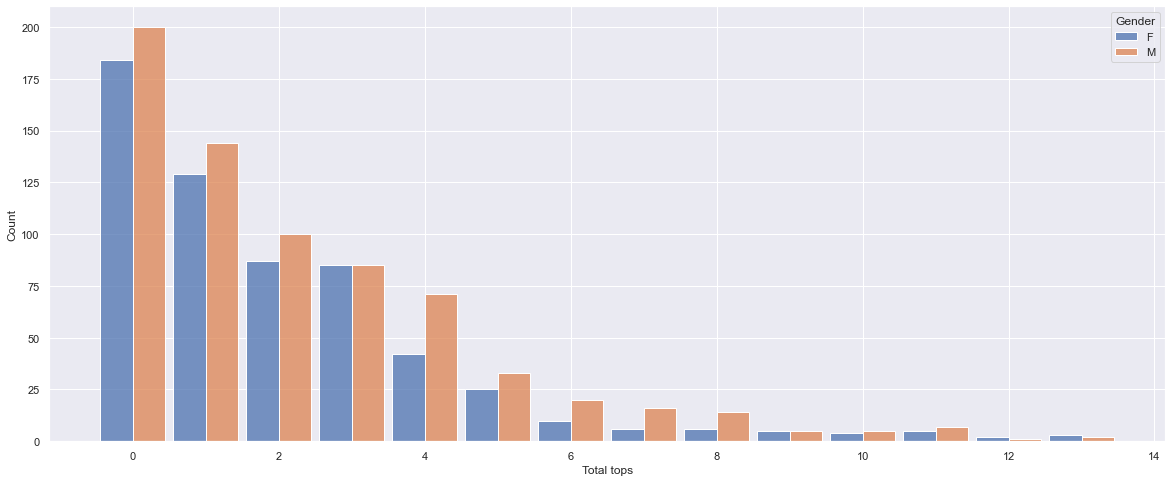

In [6]:
resultaten_kolommen = ["Qualification", "Qualification 1", "Qualification 2", "Semifinal", "Final" ]

def tops(x):
    tops = 0
    for kolom in resultaten_kolommen:
        if pd.notna(x[kolom]):
            tops = tops + (int(x[kolom][0]))
    return tops
    
world_2019_df["Total tops"] = world_2019_df.apply(tops, axis = 1)

plt.figure(figsize=(20, 8))
sns.histplot(data=world_2019_df, x = "Total tops", hue = "Gender", discrete = True, multiple="dodge", shrink = 0.9)

De bovenstaande grafiek laat zijn hoeveel tops er per klimmer per wedstrijd zijn behaald. Maar er kan ook gekeken worden naar het gemiddelde aantal tops per klimmer.

<AxesSubplot:xlabel='Total tops', ylabel='Count'>

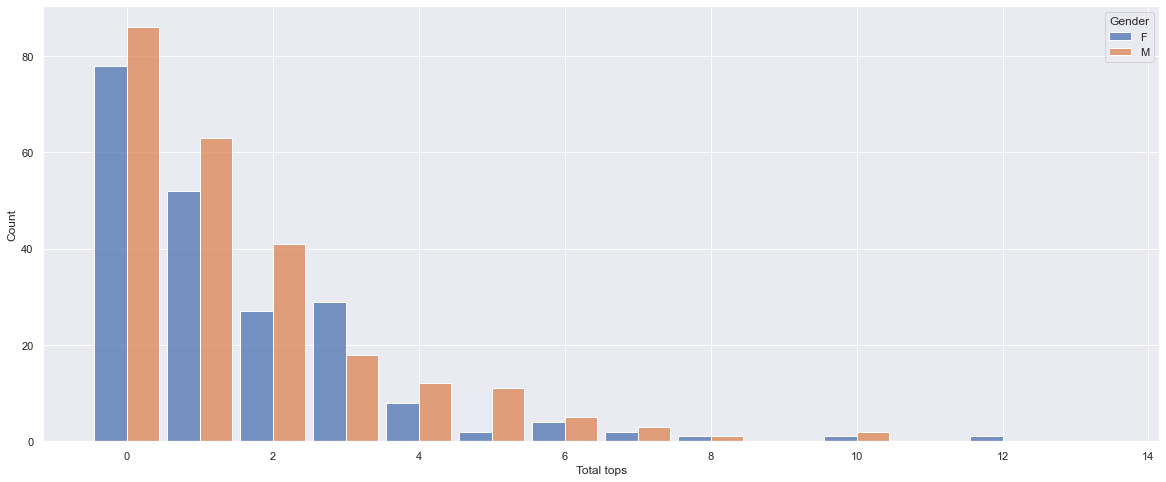

In [7]:
mean_tops = world_2019_df.groupby(["FIRST", "LAST", "Gender"])[["Total tops"]].mean().sort_values("Total tops")

plt.figure(figsize=(20, 8))
sns.histplot(data=mean_tops, x = "Total tops", hue = "Gender", discrete = True, multiple="dodge", shrink = 0.9)

Uit bovenstaande grafieken kan worden afgelezen dat maar weinig klimmers 5 of meer tops per wedstrijd halen. Het is dus interessant om de klimmers met de meeste tops naast de klimmers met de hoogste gemiddelde tops per wedstrijd te leggen.

In [104]:
print("Totaal aantal tops over alle wedstrijden:")
display(world_2019_df.groupby(["FIRST", "LAST", "Gender"])[["Total tops"]].sum().sort_values("Total tops", ascending=False).head(10)
)

print("Gemiddeld aantal tops per wedstrijd:")
display(mean_tops.sort_values("Total tops", ascending=False).head(10))

Totaal aantal tops over alle wedstrijden:


,,,Total tops
FIRST,LAST,Gender,
Janja,Garnbret,F,85
Adam,Ondra,M,58
Tomoa,Narasaki,M,52
Akiyo,Noguchi,F,51
Yoshiyuki,Ogata,M,49
Jongwon,Chon,M,48
Fanny,Gibert,F,47
Kokoro,Fujii,M,45
Jan,Hojer,M,42


Gemiddeld aantal tops per wedstrijd:


,,,Total tops
FIRST,LAST,Gender,
Janja,Garnbret,F,12.142857
Tomoa,Narasaki,M,10.400000
Akiyo,Noguchi,F,10.200000
Adam,Ondra,M,9.666667
Shauna,Coxsey,F,7.666667
Kokoro,Fujii,M,7.500000
Miho,Nonaka,F,7.000000
Yoshiyuki,Ogata,M,7.000000
Jongwon,Chon,M,6.857143


Hieruit kan geconcludeerd worden dat Janja Garnbret de klimmer is die de top van de boulder het meest haalt. Zowel gemiddeld per wedstrijd, als over de hele competitie. Bij de mannen heeft Adam Ondra de meeste tops gehaald, maar heeft Tomoa Narasaki een hoger gemiddeld aantal tops per wedstrijd. 

### 2. Welke klimmer heeft de meeste medailles gewonnen?

Zoals in iedere sport worden plaats 1 tot 3 beloont met een medaille. Als eerste worden het totaal aantal gehaalde medailles per persoon berekend.

In [102]:
def medal(x):
    if x in [1,2,3]:
        return 1
    else:
        return 0

medals_df = world_2019_df
medals_df["Medals"]= medals_df["Rank"].apply(medal)
medals_df = medals_df.groupby(["FIRST", "LAST", "Gender"])[["Medals"]].sum().sort_values("Medals", ascending=False).reset_index()
medals_df[0:10]

,FIRST,LAST,Gender,Medals
0,Janja,Garnbret,F,7
1,Akiyo,Noguchi,F,5
2,Tomoa,Narasaki,M,5
3,Adam,Ondra,M,3
4,Jakob,Schubert,M,3
5,Fanny,Gibert,F,3
6,Shauna,Coxsey,F,3
7,Yoshiyuki,Ogata,M,2
8,Jernej,Kruder,M,1
9,Jessica,Pilz,F,1


Weer staat Janja Garnbret bovenaan met 7 medailles. Ze heeft dus elke wedstrijd een medaille gewonnen! Tomoa Narasaki leidt de mannen met 5 medailles. Via een grafiek kan de distributie van deze medailles worden weergegeven.


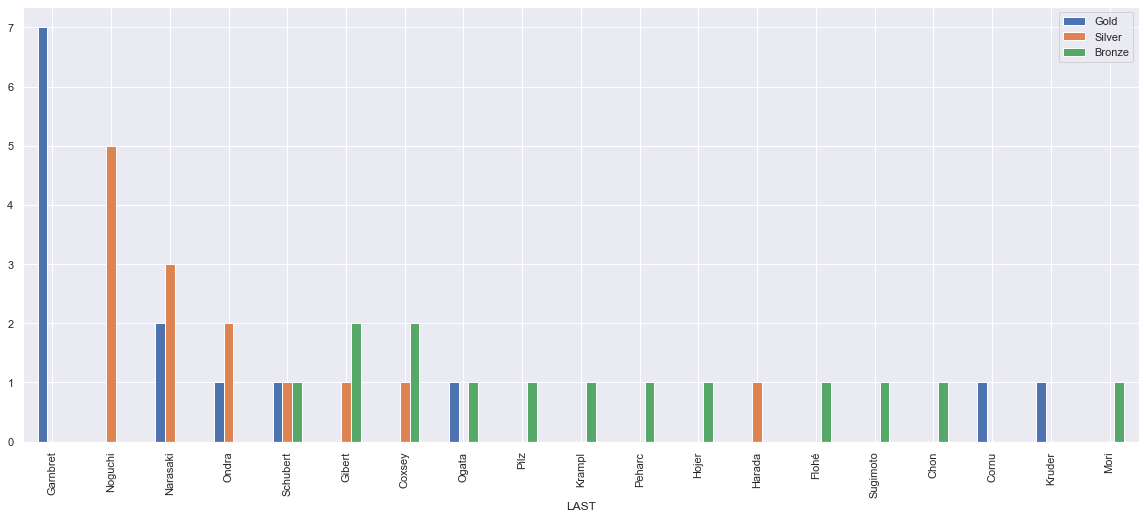

In [90]:
medals_df = medals_df[medals_df["Medals"] > 0]
medals_df[["Gold", "Silver", "Bronze"]] = 0 

for i, climber in medals_df.iterrows():
    ranks = world_2019_df[(world_2019_df["LAST"] == climber["LAST"])]["Rank"]
    medals_df.at[i, "Gold"] = len(ranks[ranks == 1])
    medals_df.at[i, "Silver"] = len(ranks[ranks == 2])
    medals_df.at[i, "Bronze"] = len(ranks[ranks == 3])

medals_df.sort_values("Medals", inplace = True, ascending=False)
medals_df.plot(x="LAST", y=["Gold", "Silver", "Bronze"], kind = "bar", figsize=(20,8));

De 7 medailles die Janja Garnbret heeft gewonnen zijn alle 7 goud!! Verder is te zien dat Narasaki de mannen leidt met de meeste gouden medailles. De klimmers met de meeste medailles hebben dus ook de meeste gouden medailles gewonnen.

### 3. Wie is de beste klimmer van 2019?

De beste klimmer is volgens het IFSC de klimmer met de hoogste score na zeven wedstrijden. Dit is eenvoudig te vinden via de kolom Points.

In [11]:
best_female = world_2019_df[world_2019_df["Gender"] == "F"]
display(best_female.groupby(["FIRST", "LAST", "Gender"])[["Points"]].sum().sort_values("Points", ascending=False).head(3))

best_male = world_2019_df[world_2019_df["Gender"] == "M"]
display(best_male.groupby(["FIRST", "LAST", "Gender"])[["Points"]].sum().sort_values("Points", ascending=False).head(3))

,,,Points
FIRST,LAST,Gender,
Janja,Garnbret,F,700
Akiyo,Noguchi,F,400
Fanny,Gibert,F,371


,,,Points
FIRST,LAST,Gender,
Tomoa,Narasaki,M,440
Adam,Ondra,M,382
Yoshiyuki,Ogata,M,290


Hierboven de top 3 beste klimmers van 2019. Aan de hand van al deze gegevens kunnen we een duidelijke conclusie trekken: Janja Garnbret is overduidelijk de beste klimmer van 2019. Ze staat bovenaan iedere lijst: aantal toppen gehaaldt, aantal medailles gewonnen en aantal punten gescordt. Ze is beter dan haar competitie. De nummers een en twee voor de mannen zijn iets gewaagder aan elkaar. Maar omdat er meer mannen meedoen, is de competitie groter, en is het dus moeilijker om de wedstrijden te domineren, zoals Janja Garnbret dat heeft gedaan.